#EDA-Exploratory Data Analysis

##1.Load and Inspect the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the Titanic dataset

df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


##2.Understand the Data Types and Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##3.Data Cleaning

##Drop same columns/rows or unwanted columns/rows

In [ ]:
df.drop(['class','embarked','alive'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


drop high number missing values column deck(Null>=50% of data)

In [ ]:
df.drop("deck",axis=1,inplace=True)

In [ ]:
# drop less null value row using dropna()
df.dropna(subset=['embark_town'],inplace=True)

<Axes: >

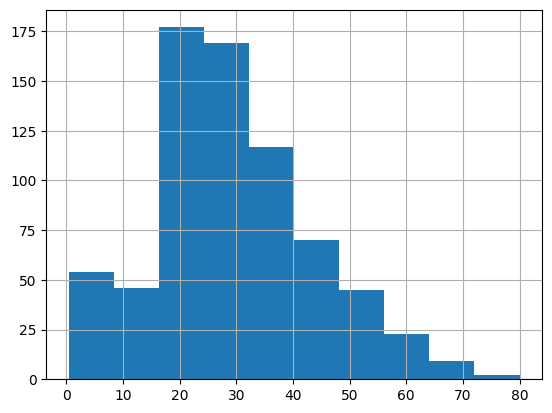

In [ ]:
# check age distribution
df["age"].hist()

In [ ]:
# Age is skewed so fill with its median value
df["age"].fillna(df['age'].median(),inplace=True)

/tmp/ipython-input-374392896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df['age'].median(),inplace=True)


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


we can use **unique()** to find **distinct** values in a column and **value_counts()** to see the **frequency of each unique value**.

In [ ]:
print(df['embark_town'].unique())

['Southampton' 'Cherbourg' 'Queenstown']


In [ ]:
df['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


cheking if in this dataset exists duplicates or not

In [ ]:
df.duplicated().sum()

np.int64(116)

In [ ]:
df.shape # check shape before droping duplicates

(889, 11)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(773, 11)

##5.Visualization

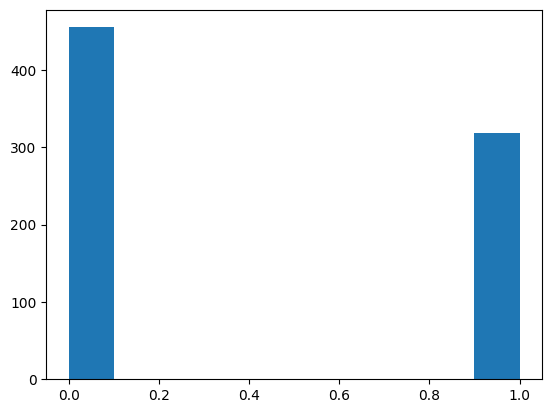

In [ ]:
plt.hist(df["survived"])
plt.show()

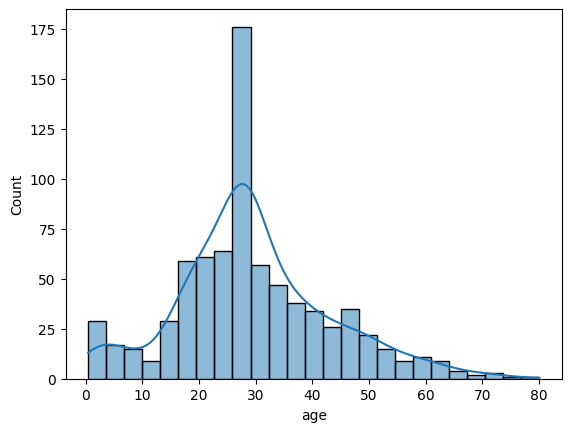

In [ ]:
sns.histplot(df['age'],kde=True)
plt.show()

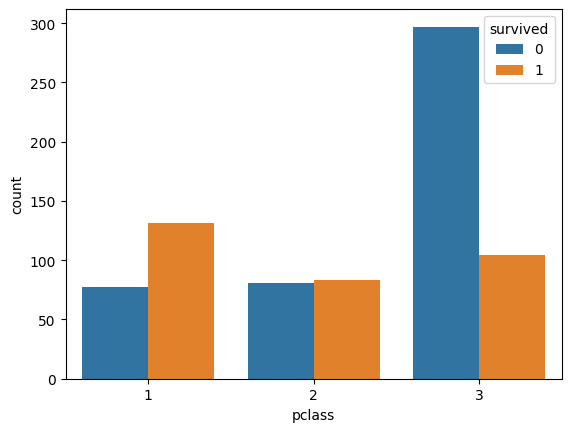

In [ ]:
sns.countplot(data=df,x='pclass',hue='survived')
plt.show()

##6. Correlation Analysis in EDA

Correlation analysis is used to quantify the strength and direction of relationships between numerical variables. It helps identify how changes in one variable are associated with changes in another.

### **Before checking correlation we need to convert all object data to numerical**

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     773 non-null    int64  
 1   pclass       773 non-null    int64  
 2   sex          773 non-null    object 
 3   age          773 non-null    float64
 4   sibsp        773 non-null    int64  
 5   parch        773 non-null    int64  
 6   fare         773 non-null    float64
 7   who          773 non-null    object 
 8   adult_male   773 non-null    bool   
 9   embark_town  773 non-null    object 
 10  alone        773 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 61.9+ KB


In [ ]:
# Converting all the nominal datas to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# df['sex'] = le.fit_transform(df['sex'])

df['who']=le.fit_transform(df['who'])
df['adult_male']=le.fit_transform(df['adult_male'])
df['alone']=le.fit_transform(df['alone'])
df['embark_town']=le.fit_transform(df['embark_town'])



In [ ]:
df["sex"].isnull().sum()

np.int64(0)

In [ ]:
dummies=pd.get_dummies(df['sex']).astype(int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
887,1,0
888,1,0
889,0,1


In [ ]:
df=pd.concat([df,dummies],axis="columns")
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,female,male
0,0,3,male,22.0,1,0,7.2500,1,1,2,0,0,1
1,1,1,female,38.0,1,0,71.2833,2,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,2,0,2,1,1,0
3,1,1,female,35.0,1,0,53.1000,2,0,2,0,1,0
4,0,3,male,35.0,0,0,8.0500,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,2,0,2,1,1,0
888,0,3,female,28.0,1,2,23.4500,2,0,2,0,1,0
889,1,1,male,26.0,0,0,30.0000,1,1,0,1,0,1


In [ ]:
# drope the orginal variable
df.drop(["sex"],axis="columns",inplace=True)
df

,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alone,female,male
0,0,3,22.0,1,0,7.2500,1,1,2,0,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,2,0,2,1,1,0
3,1,1,35.0,1,0,53.1000,2,0,2,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,2,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,2,0,2,1,1,0
888,0,3,28.0,1,2,23.4500,2,0,2,0,1,0
889,1,1,26.0,0,0,30.0000,1,1,0,1,0,1


In [ ]:
# Replace if a data is  ordinal data
# df["gender"].replace(["male","female"],[0,1],inplace=True)

### After converting check correlation

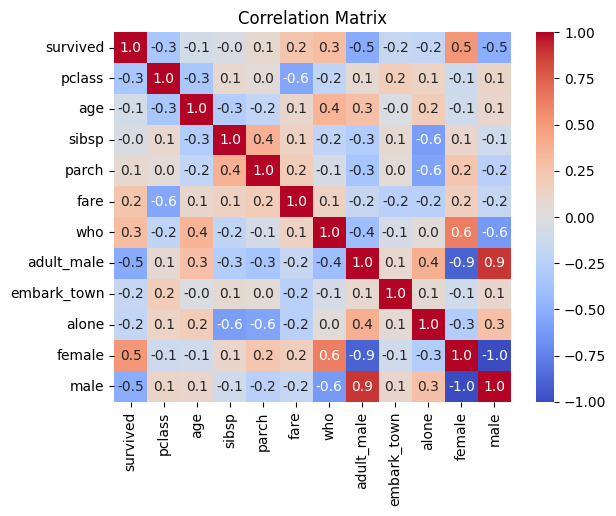

In [ ]:
#Correlation matrix
corr_matrix=df.corr()

#Heatmap of correlation matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm')# 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

### check : -Collinearity  ,multicollinearity

- Male and adult_male and female have multicollinearity so Take only one column  before droping check correlation to Target and drop less correlated

In [ ]:
df.drop(["male","female"],axis=1,inplace=True)

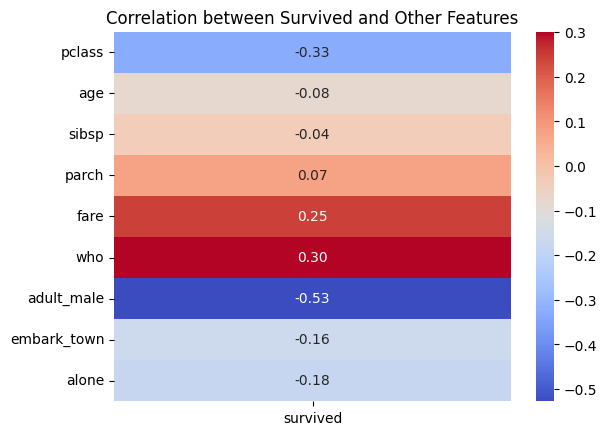

In [ ]:
# Calculate the correlation between 'survived' and all other columns
survived_corr=df.corr()['survived']

# Remove the correlation of 'survived'with itself (which is always 1)
survived_corr=survived_corr.drop('survived')

# Create a heatmap to visualize the correlations
sns.heatmap(survived_corr.to_frame(),annot=True,fmt='.2f',cmap='coolwarm',
cbar=True,annot_kws={'size':10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between Survived and Other Features')
plt.show()

###  **Now remove less correlated**

In [ ]:
df.drop(['age','sibsp','parch'],axis=1,inplace=True)

## **7.Outlier cheking and removing**

<Axes: >

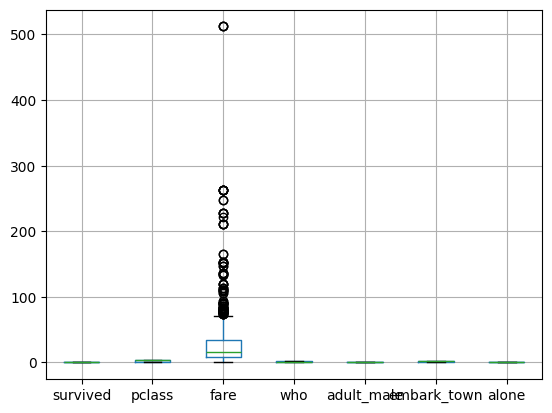

In [ ]:
df.boxplot()

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3 - Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    # Filter the DataFrame to remove rows with outliers in each column
    df=df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

# Specify the column to exclude
df_cleaned=remove_outliers_iqr(df,'survvived')
df=df_cleaned


In [ ]:
df.shape

(511, 7)

## **8. Data Scaling**

- If in a data set two features have diffrent scale of data do scaling
 - imagine if we have two features age and price so both are differnt scale so do scaling for better performance


- minmax scaling - 0-1 range
 - standard scaling - mean: 0 , standard deviation: 1  range

In [ ]:
df

,survived,pclass,fare,who,adult_male,embark_town,alone
0,0,3,7.2500,1,1,2,0
2,1,3,7.9250,2,0,2,1
3,1,1,53.1000,2,0,2,0
4,0,3,8.0500,1,1,2,1
6,0,1,51.8625,1,1,2,1
...,...,...,...,...,...,...,...
881,0,3,7.8958,1,1,2,1
882,0,3,10.5167,2,0,2,1
883,0,2,10.5000,1,1,2,1
887,1,1,30.0000,2,0,2,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select the features that you want to scale
features=['pclass','fare','embark_town','who','adult_male','alone']

# Create a MinMaxScaler object
scaler=MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df[features])

# Create a DataFrame from scaled_data with the correct column names
scaled_df=pd.DataFrame(scaled_data,columns=features)

# After **EDA** we can predict

### Use  LogisticRegression model if our dataset is classification  or if our dataset is regression use LinearRegression

In [ ]:
# use logisticRegression because our dataset is classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas



X = df[['pclass', 'fare', 'embark_town',"pclass","who","adult_male","alone"]]  # Features
y = df['survived']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



# Train a baseline logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.77


In [ ]:
# # use logisticRegression because our dataset is classification
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# import pandas as pd # Import pandas



# X = scaled_df[['pclass', 'fare', 'embark_town',"pclass","who","adult_male","alone"]]  # Features
# y = df['survived']  # Target variable


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



# # Train a baseline logistic regression model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Predict and evaluate the model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Baseline model accuracy: {accuracy:.2f}')